In [252]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [253]:
df =pd.read_csv('archive (1)/winequalityN.csv')

In [254]:
df.head()
df['type'].value_counts()

type
white    4898
red      1599
Name: count, dtype: int64

In [255]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [257]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int32  
dtypes: float64(11), int32(1), object(1)
memory usage: 634.6+ KB


In [258]:
df.isnull().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [259]:
for col, values in df.items():
    print(col)
    if col!='type':
        df[col]=df[col].fillna(df[col].mean())

type
fixed acidity
volatile acidity
citric acid
residual sugar
chlorides
free sulfur dioxide
total sulfur dioxide
density
pH
sulphates
alcohol
quality


In [290]:
df.isnull().sum()
df['quality'].dtype

dtype('int32')

## EDA

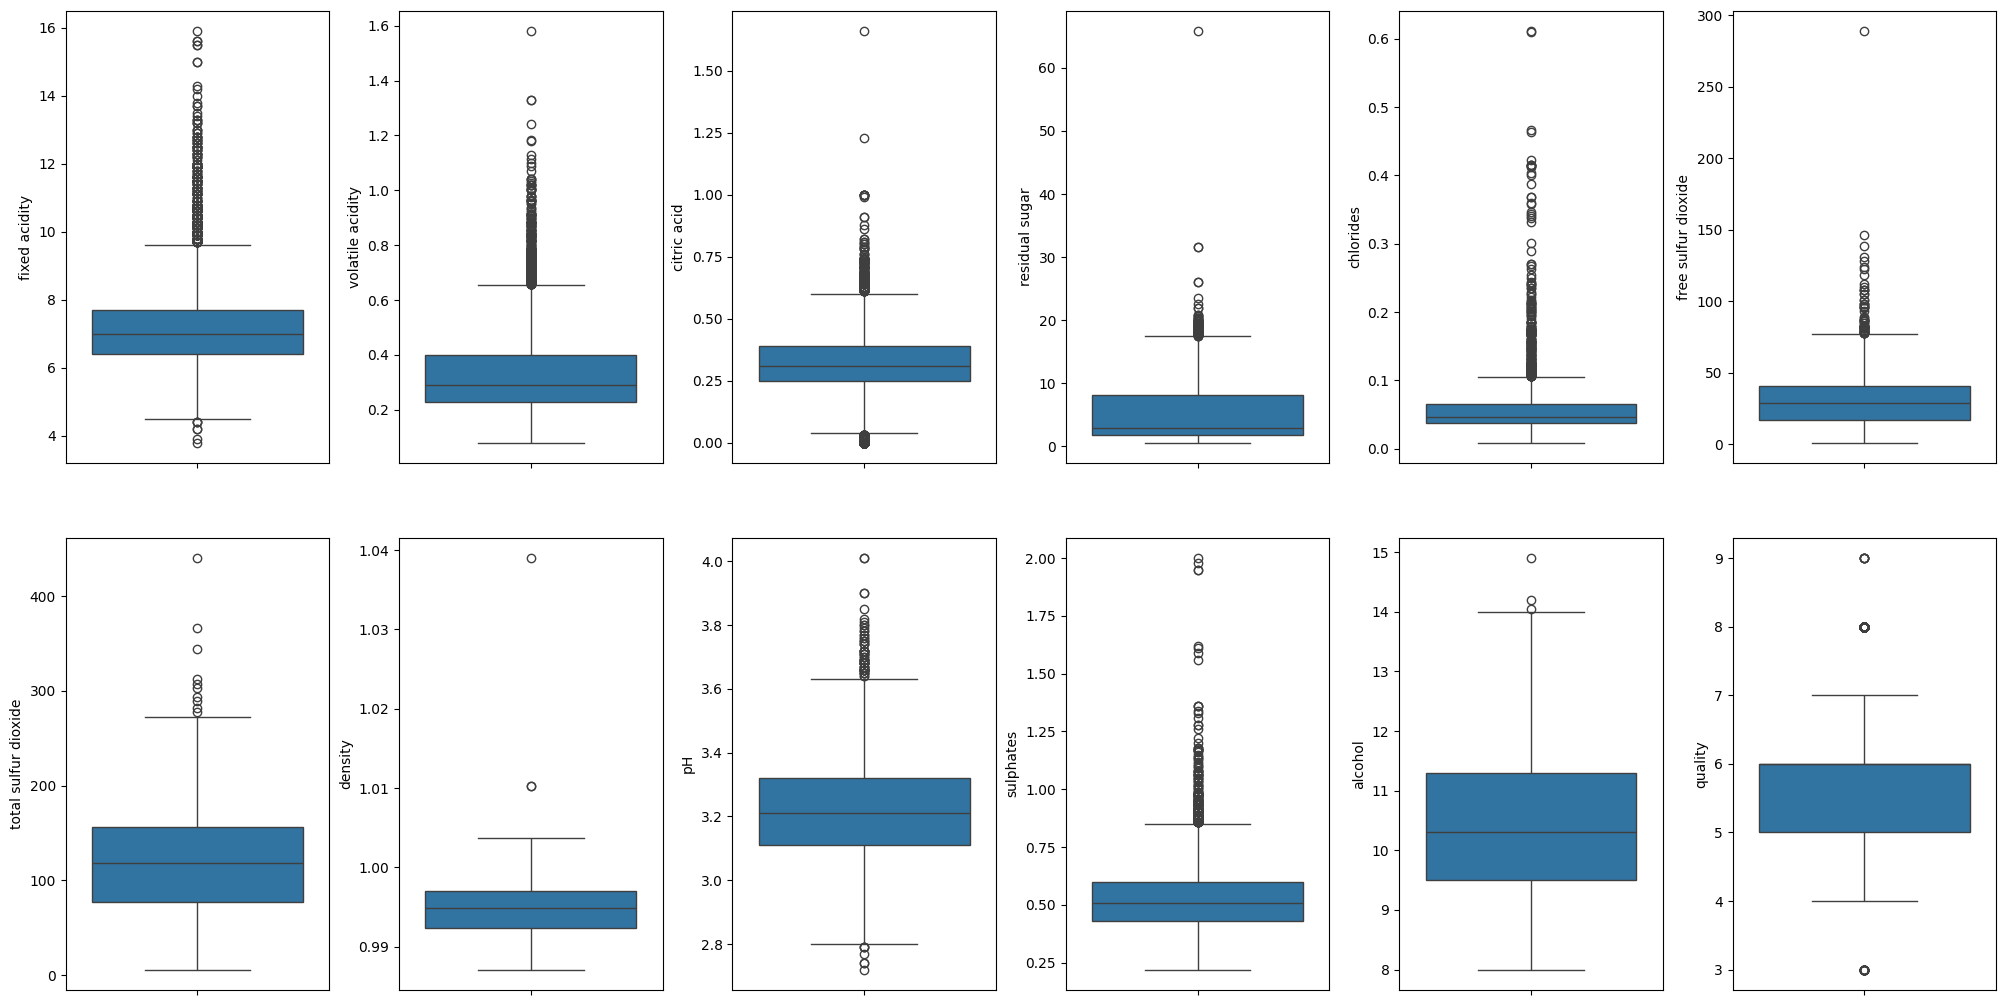

In [261]:
# for figuring out outliers
fig, ax =plt.subplots(ncols=6, nrows=2 , figsize=(20,10))
index=0
ax=ax.flatten()
for col, value in df.items():
    if col!='type':
        sns.boxplot(y=col, data=df, ax=ax[index])
        index+=1
plt.tight_layout(pad=0.5,w_pad=0.7,h_pad=5.0)


- here, density, residual sugar, citric acid, free sulphur dioxide have outliers

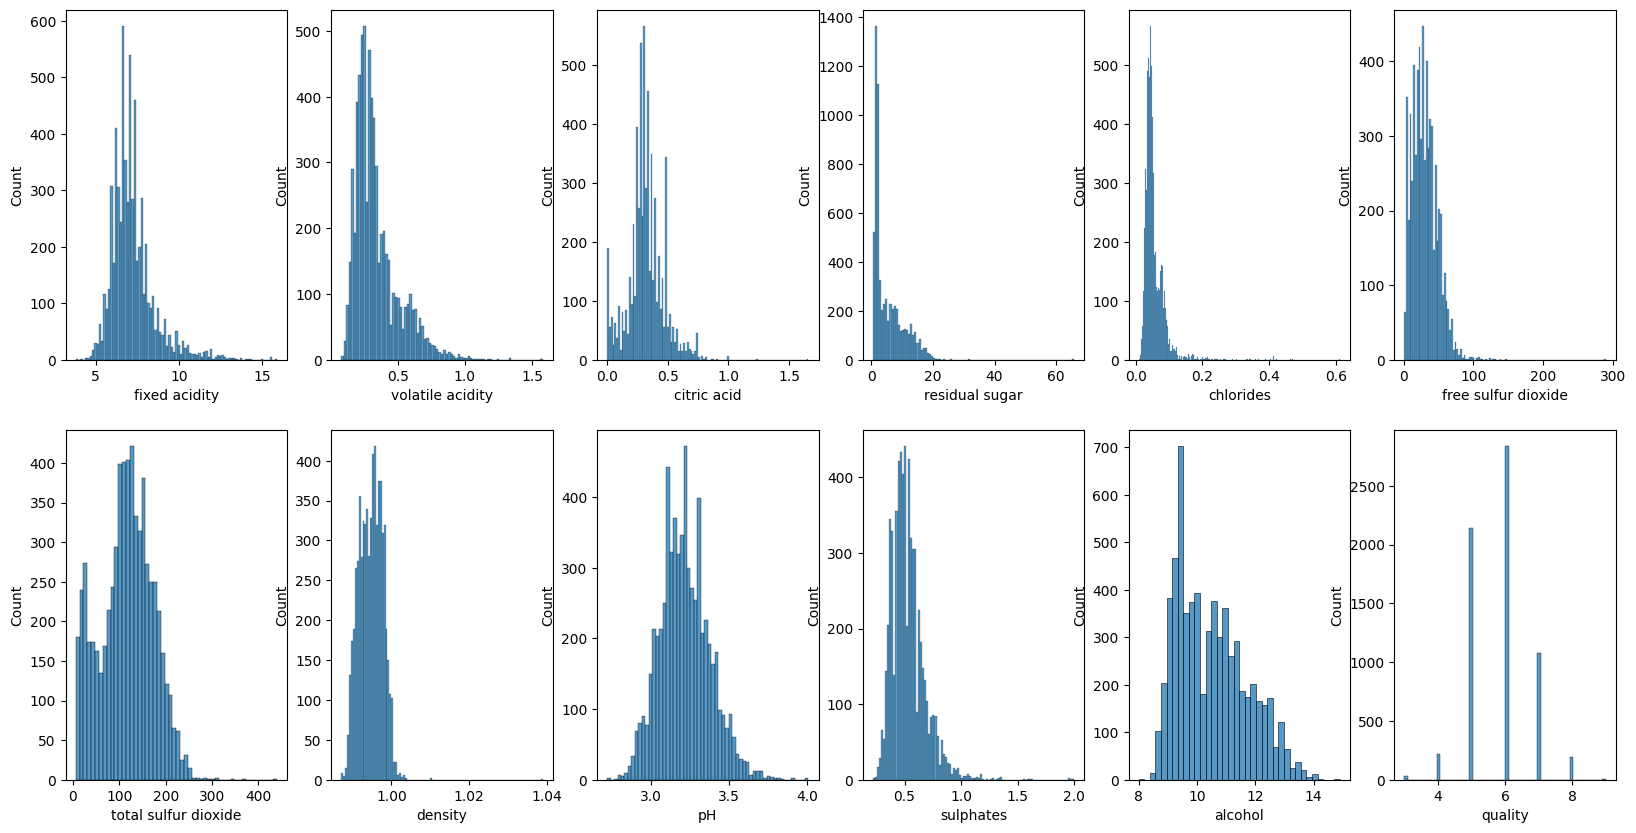

In [262]:
# distrubution plot
# for figuring out outliers
fig, ax =plt.subplots(ncols=6, nrows=2 , figsize=(20,10))
index=0
ax=ax.flatten()
for col, value in df.items():
    if col!='type':
        sns.histplot(data=df,x=col, ax=ax[index])
        index+=1
# plt.tight_layout(pad=0.5,w_pad=0.7,h_pad=5.0)


In [263]:
# Handling outliers 
# density, residual sugar, citric acid, free sulphur dioxide have outliers

df.skew(numeric_only=True)

df['citric acid'].skew()

0.4731416257030062

In [264]:
for col, value in df.items():
    if col!='type' and df[col].skew()>1:
        
        print(col,df[col].skew() )

fixed acidity 1.7241312957269574
volatile acidity 1.4964327505129182
residual sugar 1.435220659353982
chlorides 5.4006796999524225
free sulfur dioxide 1.2200660740665203
sulphates 1.7990206639078448


In [265]:
thresh = df['fixed acidity'].quantile(0.98)
print(thresh)


11.1


In [266]:
df[df['fixed acidity']>thresh] = thresh
df['fixed acidity'].skew()

1.1733140769456407

In [267]:
thresh = df['volatile acidity'].quantile(0.96)
print(thresh)

0.78


In [268]:
df[df['volatile acidity']>thresh] = thresh
df['volatile acidity'].skew()

1.1565516437172785

In [269]:
thresh = df['residual sugar'].quantile(0.99)
print(thresh)
df[df['residual sugar']>thresh] = thresh
df['residual sugar'].skew()

18.151999999999997


1.0745443379762822

In [270]:
thresh = df['chlorides'].quantile(0.987)
print(thresh)
df[df['chlorides']>thresh] = thresh
df['chlorides'].skew()

0.78


3.9130496659657568

In [271]:
# scale it first
# log transformation
df['free sulfur dioxide']=np.log(1+df['free sulfur dioxide'])

<Axes: xlabel='free sulfur dioxide', ylabel='Count'>

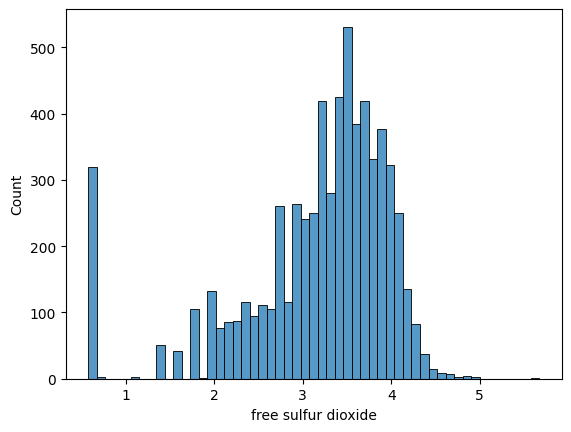

In [272]:
sns.histplot(x=df['free sulfur dioxide'], data=df)

<Axes: xlabel='type', ylabel='count'>

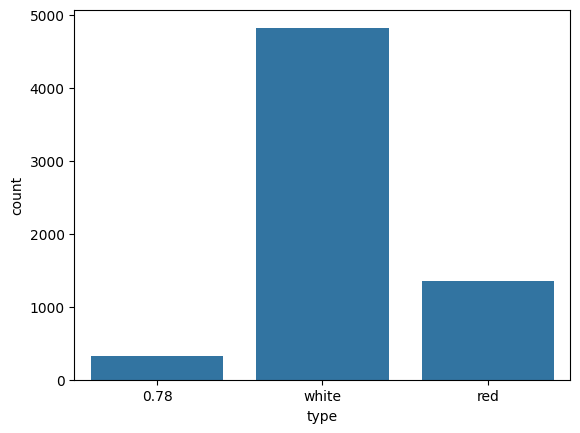

In [273]:
sns.countplot(x=df['type'])

In [274]:
df['type'].value_counts()

type
white    4822
red      1355
0.78      320
Name: count, dtype: int64

In [275]:
# df['type']=df['type'].replace((df['type']!='white') & (df['type']!='red'), 'red')
df.loc[~df['type'].isin(['white', 'red']), 'type'] = 'red'

In [276]:
df['type'].value_counts()

type
white    4822
red      1675
Name: count, dtype: int64

<Axes: xlabel='type', ylabel='count'>

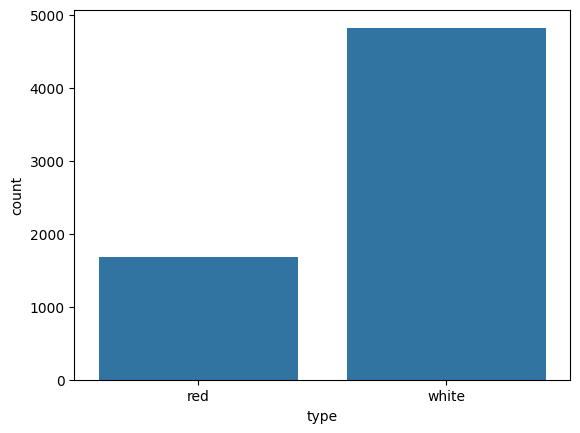

In [277]:
sns.countplot(x=df['type'])

<Axes: xlabel='quality', ylabel='count'>

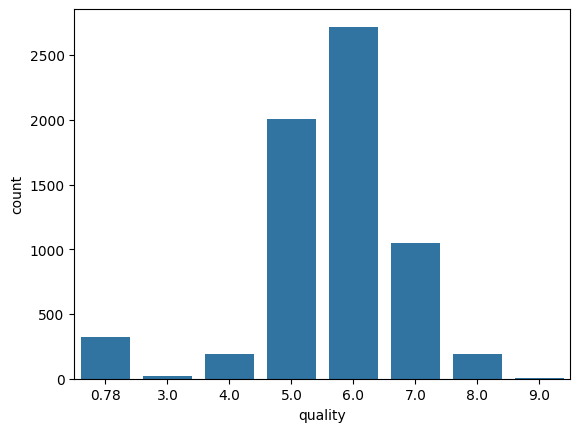

In [278]:
sns.countplot(x=df['quality'])

- data will be biased between 5,6 and 7 - that has to be balanced out 

### Correlation matrix

<Axes: >

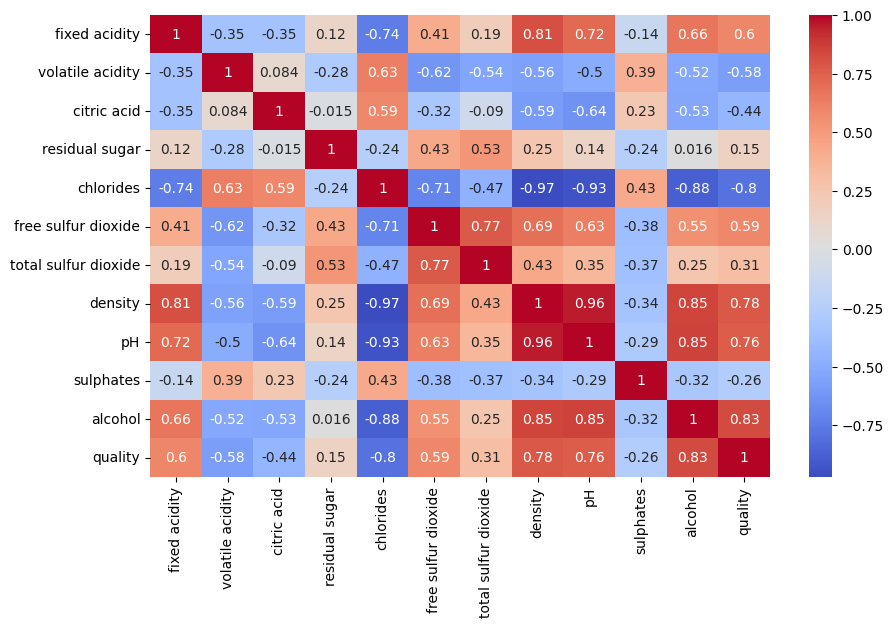

In [279]:
corr=df.corr(numeric_only=True, )
plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap='coolwarm')

In [280]:
df.drop('free sulfur dioxide', axis=1, inplace=True)

### Train and split

In [291]:
x=df.drop(columns=['type','quality'])
y=df['quality']

y=y.astype(int)

### Class imbalancement

In [282]:
x

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,total sulfur dioxide,density,pH,sulphates,alcohol
0,0.78,0.780,0.78,0.78,0.780,0.78,0.78000,0.78,0.780000,0.78
1,6.30,0.300,0.34,1.60,0.049,132.00,0.99400,3.30,0.490000,9.50
2,8.10,0.280,0.40,6.90,0.050,97.00,0.99510,3.26,0.440000,10.10
3,7.20,0.230,0.32,8.50,0.058,186.00,0.99560,3.19,0.400000,9.90
4,7.20,0.230,0.32,8.50,0.058,186.00,0.99560,3.19,0.400000,9.90
...,...,...,...,...,...,...,...,...,...,...
6492,6.20,0.600,0.08,2.00,0.090,44.00,0.99490,3.45,0.580000,10.50
6493,5.90,0.550,0.10,2.20,0.062,51.00,0.99512,3.52,0.531215,11.20
6494,6.30,0.510,0.13,2.30,0.076,40.00,0.99574,3.42,0.750000,11.00
6495,5.90,0.645,0.12,2.00,0.075,44.00,0.99547,3.57,0.710000,10.20


In [292]:
from imblearn.over_sampling import SMOTE
over=SMOTE(k_neighbors=4,)
x,y=over.fit_resample(x,y,)

In [293]:
y.value_counts()

quality
0    2719
6    2719
5    2719
7    2719
8    2719
4    2719
3    2719
9    2719
Name: count, dtype: int64

### Model training

In [294]:
from sklearn.model_selection import cross_val_score ,train_test_split
def classify(model, x,y):
    xtr,xts,ytr,yts=train_test_split(x,y,test_size=0.2,random_state=42)
    # train
    model.fit(xtr,ytr)
    print('Accuracy: ', model.score(xts,yts)*100)

    # cross validation

    score=cross_val_score(model,x,y, cv=5)
    print("CV score: ", np.mean(score)*100)

    

In [295]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
classify(model,x,y)

Accuracy:  74.81867391589267
CV score:  -817.5056373659727


In [296]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()
classify(model,x,y)

Accuracy:  83.86577798207308
CV score:  78.36526733185923


In [297]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()
classify(model,x,y)

Accuracy:  90.27809698919789
CV score:  84.4244668288701


In [298]:
from sklearn.ensemble import ExtraTreesClassifier
model=ExtraTreesClassifier()
classify(model,x,y)

Accuracy:  91.24339232360377
CV score:  85.27036141777423


In [ ]:
import xgboost as xgb
model=xgb.XGBClassifier()
classify(model,x,y)

In [301]:
pip install lightgbm

   ---------------------------------------- 0.0/1.3 MB ? eta -:--:--
   -- ------------------------------------- 0.1/1.3 MB 1.7 MB/s eta 0:00:01
   ---- ----------------------------------- 0.1/1.3 MB 1.7 MB/s eta 0:00:01
   -------- ------------------------------- 0.3/1.3 MB 1.9 MB/s eta 0:00:01
   ----------- ---------------------------- 0.4/1.3 MB 2.3 MB/s eta 0:00:01
   --------------- ------------------------ 0.5/1.3 MB 2.1 MB/s eta 0:00:01
   ------------------ --------------------- 0.6/1.3 MB 2.2 MB/s eta 0:00:01
   ------------------------ --------------- 0.8/1.3 MB 2.5 MB/s eta 0:00:01
   --------------------------- ------------ 0.9/1.3 MB 2.5 MB/s eta 0:00:01
   ------------------------------ --------- 1.0/1.3 MB 2.4 MB/s eta 0:00:01
   ---------------------------------- ----- 1.2/1.3 MB 2.5 MB/s eta 0:00:01
   ------------------------------------ --- 1.2/1.3 MB 2.3 MB/s eta 0:00:01
   -------------------------------------- - 1.3/1.3 MB 2.2 MB/s eta 0:00:01
   ----------------

In [302]:
import lightgbm
model=lightgbm.LGBMClassifier()
classify(model,x,y)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000525 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2550
[LightGBM] [Info] Number of data points in the train set: 17401, number of used features: 10
[LightGBM] [Info] Start training from score -2.087809
[LightGBM] [Info] Start training from score -2.072626
[LightGBM] [Info] Start training from score -2.079499
[LightGBM] [Info] Start training from score -2.093854
[LightGBM] [Info] Start training from score -2.071257
[LightGBM] [Info] Start training from score -2.072170
[LightGBM] [Info] Start training from score -2.085032
[LightGBM] [Info] Start training from score -2.073540
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Accuracy:  88.09469087566076
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Inf